<p style="font-size:30px">Importando módulos y leyendo el archivo .csv</p>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import glob
import pandas as pd
import re

In [3]:
file=glob.glob("*.csv")

In [4]:
datos=pd.read_csv(file[0],usecols=[0,1,2,3,4])

In [5]:
datos=datos[datos['ENTIDAD']=='Guanajuato']

In [6]:
datos_43=datos[datos['CODIGO_ACTIVIDAD']==43]

In [7]:
datos_46=datos[datos['CODIGO_ACTIVIDAD']==46]

In [8]:
merc_43=datos_43['K100W'].values
merc_46=datos_46['K100W'].values

In [9]:
merc_tot=[]
for i in range(len(merc_43)):
    tot=merc_43[i]+merc_46[i]
    merc_tot.append(tot)

In [10]:
merc_tot

[164.52611954000002,
 163.13157868000002,
 164.23950218,
 177.9215269,
 177.25581369,
 174.21649367,
 182.49520581000002,
 174.52929491,
 172.42641343,
 185.34324225,
 171.95480179,
 181.11724828,
 152.55721716,
 150.68744501,
 160.62879122,
 157.7509555,
 160.71857697000002,
 162.13054992999997,
 171.70038229,
 159.4884074,
 153.91144291,
 171.69012913,
 174.37073729,
 182.92578220000001,
 154.44581143,
 155.89669813,
 178.15190802,
 166.80679916000003,
 163.41989632000002,
 167.99385746,
 171.58198734,
 170.77408825,
 169.25257390000002,
 186.25551331999998,
 186.24940018,
 191.67266079,
 154.79999256,
 159.99572222,
 175.76028304,
 164.9678472,
 172.69568213,
 175.35300940000002,
 176.1829022,
 184.71884046000002,
 179.96626869,
 188.66547878,
 200.13975643999999,
 202.31129889,
 176.86987087,
 174.1978826,
 186.14670935,
 176.58084155,
 197.34786526,
 189.46565517,
 187.42769343999998,
 200.15985454,
 190.64910369,
 217.82586781999998,
 222.1038182,
 220.11457474,
 187.43084867,
 1

<p style="font-size:30px">Gráfica de los datos</p>

In [11]:
meses = np.arange(len(datos_43))

In [12]:
for i in range(len(meses)):
    meses[i] = meses[i] + 1

Text(0, 0.5, 'K100W')

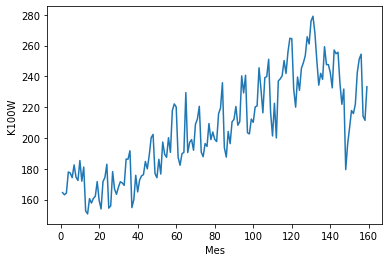

In [13]:
plt.plot(meses,merc_tot)
plt.xlabel('Mes')
plt.ylabel('K100W')

<p style="font-size:30px">Haciendo el ajuste polinomial</p>

In [16]:
fits=[]
m,n,p,q,r,s,t,u,b = np.polyfit(meses,merc_tot,8)
fits.append(m)
fits.append(n)
fits.append(p)
fits.append(q)
fits.append(r)
fits.append(s)
fits.append(t)
fits.append(u)
fits.append(b)

In [26]:
fits

[1.0941010488289785e-13,
 -4.53860066817757e-11,
 5.0133104673499385e-09,
 2.830105232161398e-07,
 -9.519874506850869e-05,
 0.006778658362009159,
 -0.17439399870456623,
 1.3650936871410662,
 168.13043624937725]

In [27]:
merc_est=[]
for i in range(len(meses)):
    proy = fits[0]*((i+1)**8) + fits[1]*((i+1)**7) + fits[2]*((i+1)**6) + fits[3]*((i+1)**5) + fits[4]*((i+1)**4) + fits[5]*((i+1)**3) + fits[6]*((i+1)**2) + fits[7]*(i+1) + fits[8]
    merc_est.append(proy)

<p style="font-size:30px">Gráfica del ajuste polinomial contra datos</p>

Text(0, 0.5, 'K100W')

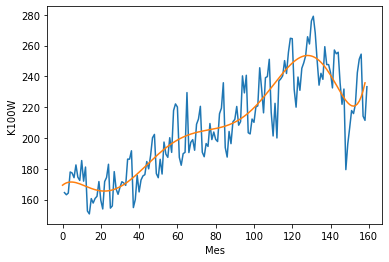

In [28]:
plt.plot(meses,merc_tot,merc_est)
plt.xlabel('Mes')
plt.ylabel('K100W')

<p style="font-size:30px">Determinando el error porcentual</p>

In [29]:
dif = []
for i in range(len(meses)):
    difer = ((merc_est[i]-merc_tot[i])/merc_tot[i])*100
    dif.append(difer)

In [30]:
max(dif)

25.99488410494252

Text(0, 0.5, 'Diferencia porcentual')

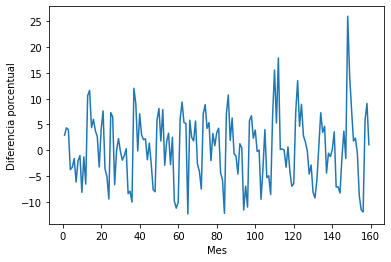

In [31]:
plt.plot(meses,dif)
plt.xlabel('Mes')
plt.ylabel('Diferencia porcentual')

<p style="font-size:30px">Extrapolación para los meses faltantes del 2021</p>

In [32]:
proyeccion=[]
for i in range(160,169):
    pr=fits[0]*(i**8) + fits[1]*(i**7) + fits[2]*(i**6) + fits[3]*(i**5) + fits[4]*(i**4) + fits[5]*(i**3) + fits[6]*(i**2) + fits[7]*i + fits[8]
    proyeccion.append(pr)

In [33]:
proyeccion

[242.33920300882275,
 250.4613596106305,
 260.3502615256044,
 272.2097116573258,
 286.2586105744232,
 302.7317118841941,
 321.88040253547524,
 343.97350854225056,
 369.29812662535005]

Text(0, 0.5, 'K100W proyectado')

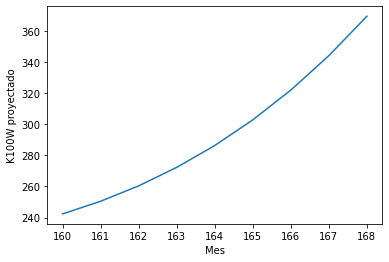

In [34]:
plt.plot(range(160,169),proyeccion)
plt.xlabel('Mes')
plt.ylabel('K100W proyectado')